# Simulating Rutherford Scattering
## Freddie Nunn
### Eton College Computational Physics Prize 2022
***

## 1. Introduction
***
### 1.1 History of Rutherford Scattering
Rutherford Scattering is a phenomenon first explained by Ernest Rutherford in 1911; it describes the scattering of charged particles due to the Coulomb Interaction (force between charged particles). The phenomenon was first tested by Hans Geiger and Ernest Marsden in 1909 using the gold foil experiment, shown below:

<img src="images/Hnet.com-image.png" alt="Gold Foil Diagram" style="width:400px;">

The experiment consisted of bombarding a thin gold foil with alpha particles from a radium source, and measuring the angle it comes out with a fleorescent screen. At the time, the most widely accepted model of an atom was Thomson's 'plum pudding' model, which describes an atom as a sperical region of positive charge with negative particles scattered inside. According to this model, the particles should pass through the atoms with very little deflections in their path, as there is no large concentration of charge to deflect the particles. They found most particles went through without much deflection, as expected, but a few particles were deflected very large angles. This was not explained until Rutherford published his paper in 1911 detailing the Rutherford model of the atom, which consists of a small positive densly charged area in the center of the atom called the nucleus, orbited by negative particles. This explained the experiment's behaviour, as a small amount of the alpha particles would get very close to the nucleus, exerting a large force on the alpha particle, in turn causing a large deflection. This model is very similar to the one used today, and was a big leap for particle physics.


### 1.2 The Physics of Rutherford Scattering

Rutherford scattering is a direct consequence of Coulombs Law, which describes the force between charged objects.
$$ {F = -\frac {1}{4\pi \epsilon_{0}}\frac {q_{1}q_{2}}{r^{2}}} $$
Where $F$ is the force on the object in the direction of the other object, $\epsilon_{0}$ is the permutivity of a vacuum, $q_{1}$ and $q_{2}$ are the charges of the objects, and $r$ is the distance between them. The main consequences of this in this context are:
1. The force between the particles increases as they get closer
2. the direction of the force on the alpha particle is directly away from the nucleus.

These 2 factors result in a behaviour where most of the particles' trajectories are fairly unchanged, since they don't get close enough to a nucleus for the force to be significant, but a few particles that get close enough to the nucleus are pushed away, changing their trajectory drastically. This change in trajectory is what Rutherford measured to create his atom model, and is what I will be attempting to recreate.

## 2. Model Overview
***
The aim of this model is to model Rutherford Scattering by simulating the Gold Foil experiment that Geiger and Marsden performed. I will then measure the distribution of scattering angles, and compare it to real data to check its accuracy.

### 2.1 Factors to Consider

In order to create as accurate a model as possible, I will need to consider all factors that could affect the scattering angle, and decide whether to include them in my model or not.

#### 2.1.1 Included Factors


##### Material and Lattice Structure

In the original experiment, they fired the alpha particles at a thin leaf of gold lattice a few atoms thick. However, in Rutherford's paper he repeated the experiment with multiple different materials, to verify the scattering effect with different materials and investigate the effect of different atom weights and sizes. In my model, varying the material is much easier than Rutherford's experiment, and is just a question of different numbers. My final model will also use a 3 Dimensional lattice  to be as accurate as possible, but I will also model a single atom and a 2 Dimensional lattice on the way, as they are easier and allow me to more closely invesigate specific parts of the model.

##### Alpha Particle Velocity

The velocity of the alpha particles directly affects the angle of deflection, as the faster the particle is, the less time it spends close to the nucleus and so it will be pushed less. In Rutherford's experiments, he used a radium source to emit alpha particles with a random distribution of velocities. However, I will use a constant velocity for all of the alpha particles. While this means the results may slightly differ from Rutherford's, it also means the results will be more accurate, as each particle from the same position will be deflected the same amount; A luxury unavailable to Rutherford at the time.

##### Effect of Force on Nucleus

The Coulomb Force acts on both particles involved, and so the nucleus will also feel a repulsive force from the alpha particle. This creates a small 'recoil' in the nucleus, which can affect the deflection angle. I will take the same approach as with the lattice structure, by implementing it once I have a basic model completed.

#### 2.1.2 Exluded Factors


##### Relativistic Effects

According to Einstein's Special Relativity, an object's mass is affected by its velocity by a factor of $\frac {1}{\sqrt {1 - \frac {v^{2}}{c^{2}}}} $, where $v$ is the object's velocity and $c$ is the speed of light in a vacuum. To decide whether to include this in my model, I calculated the speed of an alpha particle being emitted from a radium source. The alpha particles emitted have 5.6 MeV of energy, and using $KE = \frac {1}{2}mv{2}$ and a mass of 4u, I found the speed to be $1.6\times10^{7} m s^{-1}$. I then calculated the relativistic mass using the factor stated earlier, and I got $6.7\times10^{-27}kg$. Finally, I calculated the % change of mass using the following formula:
$$ \frac {m_{rel} - m}{m} \times 100\% $$
Where $m$ is the standing mass and $m_{rel}$ is the relativistic mass, and got 0.15% change. This shows that at these speeds, the change in mass is neglegable, and I can safely assume the particles do not feel these relativistic effects in my model, without significantly affecting the results.

##### Charge Distribution in Particles

In my model, I will assume charge is distributed uniformly within the particles. In reality, this is not true, as charge is contained in discreet protons within the nucleus. However, Coulomb's Law only works with point charges or uniformly distributed charge in a sphere, and so this assumption must be made for the model to hold up. Once I have completed the model, I may be able to depict this accurately by considering the Coulomb force from each proton in a nucleus, increasing the accuracy of the results.

### 2.2 Model Breakdown

#### 2.2.1 Parameters

The parameters for this model can be split into 3 main categories: alpha particle, Nucleus, and simulation parameters.

##### Alpha Particle

- $Q_{1}$: Charge of the particle
- $m_{\alpha}$: Mass of the particle
- $r_{\alpha}$: Radius of the particle
- $u$: Initial speed

The mass, charge and radius of the particle will be based off the actual alpha particle values. Initial speed will be chosen to follow Geiger and Marsdon's original experiment as similarly as possible.

##### Nucleus

- $Q_{2}$: Charge of the nucleus
- $m_{n}$: Mass of the nucleus
- $r_{n}$: radius of the nucleus

The mass, charge and radius will be decided by the material being used. This will be gold for most of the simulation to correlate with the original experiments.

##### Simulation

- $a$: Activity of the source
- $r_{max}$: radius of source
- $n$: number of alpha particles
- $A$: Area of lattice
- $t$: thickness
- $d$: Distance from source to lattice

the activity decides the chance an alpha particle is created and will be based off the radium source used in the original experiment. The radius of the source determines the size of the area from wherer the alpha particles are emitted. The number of alpha particles is the total number emitted, and so determines how long the simulation will take and how accurate the results will be. The area and thickness of the lattice decide the size of the lattice that the alpha particles will be fired into. The distance between source and lattice decides both how far away alpha particles are when they are created, and the distance from the lattice at which their scattering angle should be measured. 

#### 2.2.2 The Simulation

This describes the oultine of the simulation process.

1. Initialize the atoms with positions according to the lattice shape and size, and values according the the material being used.
2. Choose whether to create an alpha particle or not randomly, according to the activity.
   - If an alpha particle is created, initialize it with a position randomly on a 2D plane representing the source.
3. Calculate the net force on each alpha particle by combining the force from each nucleus.
4. Move forward a fixed timestep and change the alpha particles accordingly.
5. If an alpha particle is over $d$ distance from the centre of the lattice, measure its scattering angle, and delete the particle.
6. repeat steps 2-5 until $n$ alpha particles have been created and deleted.

## 3. Algorithm Details
***
Here I will go over the details and mathematics involved with the algorithms I will create.
### 3.1 Distance and Force

The core algorithms in this model are calculating the distance and force between particles. This forms the basis of how Rutherford Scattering work.

Distance is calculated using the Euclidean Distance formula between 2 vectors A and B:
$$ r = \sqrt{(x_{A}-x_{B})^{2}+(y_{A}-y_{B})^{2}+(z_{A}-z_{B})^{2}} $$
and force can be calculated using Coulomb's Law.
$$ {|F| = \frac {Q_{A}Q_{B}}{4\pi \epsilon_{0}r^{2}}} $$
This gives us the magnitude of the force, but we then need to calculate the force vector. Since both we know both particles will always be positive, the direction of the force must be directly away from the other particle. Therefore for a force on A, the direction is:
$$ \vec{BA} = \begin{pmatrix} x_{A}-x_{B} \\ y_{A}-y_{B}  \\  z_{A}-z_{B} \end{pmatrix} $$
We can now calculate the force vector.
$$ F =  \lambda\times\vec{BA} $$
$$ |F| =  \lambda|\vec{BA}| $$
$$ F = \frac{|F|}{|\vec{BA}|}\times \vec{BA} $$

##### 3.1.1 Net Force
Calculating the net force is as simple as adding up the forces from all particles.
$$ \sum F = \sum_{i}\begin{pmatrix} x_{i} \\ y_{i}  \\  z_{i} \end{pmatrix} $$




### 3.2 Update Position and Velocity

I used a time integration method to update position and velocity in discrete chunks of time. To do this, I used the Kinematic equations:
$$ v(t+\Delta t) = v(t) + a(t)\Delta t $$
$$ x(t+\Delta t) = x(t) + v(t+\Delta t)\Delta t $$
Position and velocity will both have starting values, and acceleration is calculated using $a=F/m$, where $F$ is the net force on the particle. $\Delta t$ refers to the timestep, which will be calculated in a seperate algorithm. I am using a semi-implicit method, where the velocity from after the timestep is used to update the position; this is more accurate than the explicit method of using the current velocity. You will notice a fully implicit method where the acceleration from after the timstep is used to update the velocity is not possible, as the position after the timestep is needed for this, which we do not have. Therefore, the equations to update velocity and position are as follows:
$$ v_{n+1} = v_{n} + \frac{\sum F}{m}\Delta t $$
$$ x_{n+1} = x_{n} + v_{n+1}\Delta t $$

#### 3.2.1 Calculate Timestep
The value of the timestep I use directly affects the efficiency and accuracy of the program. Smaller timesteps give more accurate results, but are slower. To improve efficiency and accuracy, I used a variable timstep method, where the timstep is proportional to the smallest distance from particle to nuclei. I also introduced a maximum and minimum timestep to ensure accuracy and efficiency. Using trial and error, I landed on $10^{15}$ and $10^{23}$ for the min and max respectively, and $10^{-8}$ for the proportional constant.
$$ \Delta t=max(min(d\times 10^{-10}, 10^{-15}), 10^{-23}) $$

### 3.3 Calculate Angle
To calculate the total angle a particle has been deflected by, we can use the equation for the dot product:
$$ A \cdot B = |A||B|cos(\theta) $$
where A and B are vectors, and $\theta$ is the angle between them. since the direction of the velocity vector of a particle represents the direction it is travelling, the angle btween the initial velocity and the final velocity represents the deflection angle. Thus, we can calculate the deflection angle as follows:
$$ \theta = cos^{-1}(\frac{V_{0} \cdot V_{f}}{|V_{0}||V_{f}|}) $$
Where $V_{0}$ is the initial velocity and $V_{f}$ is the final velocity.

### 3.4 Lattice creation

#### 3.4.1 Single Nucleus
To create a single nucleus, a particle with 0 speed is initialized at point $(0, 0, d)$.

#### 3.4.2 2D & 3D Lattice
The gold lattice is arranged in a face-centered cubic lattice; this is where the lattice is made of multiple unit boxes stacked together, each box having a particle at each corner and the centre of each face, as shown.

<img src="images/FaceCentredCubic.png" alt="Gold Foil Diagram" style="width:400px;">

The length, $a$, of the unit cube is determined by the weight and density of the material. since $\rho = m/V$, the side length of the unit cube can be determined as $a = \sqrt[3]{m/\rho}$. Since there are 4 full atoms in the cube (8 lots of 1/8 atoms in the corners, 6 lots of 1/2 atoms at the faces), the side length can be determined.
$$ a = \sqrt[3]{4m/\rho} $$
Where $m$ is the mass of 1 atom of the material, and $\rho$ is the density of the material.

### 3.5 Handling Particles

#### 3.5.1 Particle Creation
At each timestep, there is a chance an alpha particle is created based of the activity of the source. This probability is represented by $a \Delta t$, where $a$ is the activity and $\Delta t$ is the timestep.
If a particle is created, it is given a random coordinate on the x-y plane. This is generated as follows:
$$ \bold r = \begin{pmatrix} R cos(\Theta) \\  R sin(\Theta)  \\  0 \end{pmatrix} $$
Where $R$ is a uniformly distributed random variable between 0 and $r_{max}$, and $\Theta$ is a uniformly distributed random variable between 0 and $2\pi$.

#### 3.5.2 Particle Deletion
The particle is deleted when it is at least $d$ distance from the closest nucleus. At this point, the angle is calculated and stored, and then the particle is deleted.

## 4. The Model
***

In [1]:
# Establishing dependencies

import numpy as np
import numpy.random as rand
from enum import Enum
import pickle

# setting random seed to ensure repeatability
np.random.seed(1)

# setup of Particle class
class Particle:
    """
    Particle class

    Constants:
        E0: permittivity of free space
        u: mass of a nucleon
        e: elementary charge

    INIT:
        Parameters:
            mass: relative mass of the particle
            charge: relative charge of the particle
            position: starting position of the particle
            velocity: starting velocity of the particle

        Attributes:
            mass: mass of the particle in kg
            charge: charge of the particle in coulombs
            position: starting position of the particle
            velocity: starting velocity of the particle
            initialVel: initial velocity of the particle
            initialOffset: distance from (0, 0, 0) as start

    """

    E0 = 8.85e-12
    u = 1.66e-27
    e = 1.602e-19

    def __init__(self, mass: float, charge: float, position: np.array, velocity: np.array):

        self.mass = mass*self.u
        self.charge = charge*self.e
        self.position = position
        self.velocity = velocity
        self.initialVel = velocity
        self.initialOffset = np.linalg.norm(position)

    def distance(self, particle):
        """calculates distance between given particle and self

        Args:
            particle ([Particle]): a single particle

        Returns:
            Float: distance
        """
        return np.linalg.norm(self.position-particle.position)
    
    def minDistance(self, particles):
        """calculates minimum distance from a set of nuclei

        Args:
            particles ([Particle]): array of nuclei

        Returns:
            Float: minimum distance
        """
        return min([np.linalg.norm(self.position-particle.position) for particle in particles])

    def attraction(self, particle):
        """calculates magnitude of force from a particle on self

        Args:
            particle (Particle): single nuclei

        Returns:
            Float: magnitude of electric force
        """
        return (self.charge*particle.charge)/(4*np.pi*self.E0*(self.distance(particle)**2))

    def netForce(self, particles):
        """calculates net force on particle as a vector

        Args:
            particles ([Particle]): array of nuclei

        Returns:
            np.array: force on the particle as a vector
        """
        force = np.zeros(3)
        for particle in particles:
            forceMag = self.attraction(particle)
            direction = self.position-particle.position
            force += (forceMag/np.linalg.norm(direction))*direction

        return force
    
    def updatePosVel(self, particles, TIMESTEP):
        """updates the particle's position and velocity after a given timestep

        Args:
            particles ([Particle]): array of nuclei
            TIMESTEP (_type_): change in time
        """
        a = self.netForce(particles)/self.mass
        self.velocity += a*TIMESTEP
        self.position += self.velocity*TIMESTEP
    
    def calcTimeStep(self, particles):
        """calculates timestep for the particle

        Args:
            particles ([Particle]): array of nuclei

        Returns:
            Float: timestep
        """
        dist = min([self.distance(particle) for particle in particles])
        return max(min((dist*1e-9),1e-14), 1e-23)
    
    def calcAngle(self):
        """calculates deflection angle from when it was initialized

        Returns:
            Float: deflection angle
        """
        dot = np.dot(self.velocity, self.initialVel)
        angle = np.arccos(dot/(np.linalg.norm(self.velocity)*np.linalg.norm(self.initialVel)))
        return np.degrees(angle)

# Enum for different particles
class ParticleType(Enum):
    """
    Values:
        m: relative mass of particle
        q: relative charge of particle
        u: initial speed of particle
        dens: density of material
    """

    ALPHA = {"m": 4,
            "q": 2,
            "u": 1.6e7}
    GOLD = {"m": 197,
            "q": 79,
            "u": 0,
            "dens": 19300}

# setup of RutherfordSystem class
class RutherfordSystem:
    """
    INIT:
        Parameters:
            activity: activity of the alpha source
            rMax: maximum offset from center for the alpha particles
            l: length of the nuclei array
            t: thickness of the nuclei array
            d: distance from source to nuclei
            particleType: particle type of source particle
            nucleusType: particle type of the nuclei
        Attributes:
            particleType: particle type of source particle
            d: distance from source to nuclei
            nuclei: array of nuclei lattice
            activity: activity of the alpha source
            rMax: maximum offset from center for the alpha particles
            timestep: variable amount of time for each step

    """

    def __init__(self, activity, rMax, l, t, d, particleType: ParticleType, nucleusType: ParticleType):
        self.particleType = particleType
        self.d = d
        self.nuclei = self.createLattice(l, t, d, nucleusType)
        self.activity = activity
        self.rMax = rMax
        self.timeStep = 0
    
    def unitBoxLength(self, nucleusType):
        """calculate the length of the unit box of the given particle lattice

        Args:
            nucleusType (ParticleType): type of particle in the lattice

        Returns:
            Float: unit box length
        """
        vol = (4*nucleusType.value["m"]*Particle.u)/nucleusType.value["dens"]
        return vol**(1/3)
    
    def createLattice(self, length, t, d, nucleusType):
        """returns either single nuclei, 2D lattice of 3D lattice based on the length and thickness of the lattice

        Args:
            length (Float): length of the lattice
            t (Float): thickness of the lattice
            d (Float): Distance of lattice from source
            nucleusType (ParticleType): type of particle in the lattice

        Returns:
            [Particle]: Array of nuclei on lattice
        """
        if t == 0 and length ==0:
            return [Particle(nucleusType.value["m"], nucleusType.value["q"], np.array([0., 0., d]), np.array([0., 0., 0.]))]
        elif t == 0:
            # Create 2D lattice
            nuclei = []
            boxLen = self.unitBoxLength(nucleusType)
            xPos = -length/2
            yPos = -length/2
            layerOffset = False
            while yPos <= length/2:
                while xPos <= length/2:
                    nuclei.append(Particle(nucleusType.value["m"], nucleusType.value["q"], np.array([xPos, yPos, d]), np.array([0., 0., 0.])))
                    xPos += boxLen
                yPos += boxLen
                layerOffset = not layerOffset
                if layerOffset:
                    xPos = (boxLen-length)/2
                else:
                    xPos = -length/2

            return nuclei
        else:
            #  Create 3D lattice
            nuclei = []
            boxLen = self.unitBoxLength(nucleusType)
            xPos = -length/2
            yPos = -length/2
            zPos = self.d
            xlayerOffset = False
            zlayerOffset = False
            while zPos <= (self.d + t):
                while yPos <= length/2:
                    while xPos <= length/2:
                        nuclei.append(Particle(nucleusType.value["m"], nucleusType.value["q"], np.array([xPos, yPos, zPos]), np.array([0., 0., 0.])))
                        xPos += boxLen
                    yPos += boxLen
                    xlayerOffset = not xlayerOffset
                    if xlayerOffset:
                        xPos = (boxLen-length)/2
                    else:
                        xPos = -length/2
                zPos += boxLen/2
                zlayerOffset = not zlayerOffset
                xlayerOffset = zlayerOffset
                yPos = -length/2
                if xlayerOffset:
                    xPos = (boxLen-length)/2
                else:
                    xPos = -length/2
            return nuclei
    
    def newParticle(self, pos):
        """Creates new particle to be emitted from source

        Args:
            pos (np.array): initial position of particle

        Returns:
            Particle: new particle
        """
        return Particle(self.particleType.value["m"], self.particleType.value["q"], pos, np.array([0., 0., self.particleType.value["u"]]))
    
    def randomPoint(self):
        """Creates random starting position for new particles within rMax

        Returns:
            np.array: starting position
        """
        theta = rand.uniform(0,2*np.pi, 1)
        radius = rand.uniform(0,self.rMax, 1)
        return np.array([(radius*np.cos(theta))[0], (radius*np.sin(theta))[0], 0.])
    
    def cache(self, name):
        """caches current system into cache folder

        Args:
            name (String): name of cache file

        Returns:
            String: name of cache file
        """
        with open(f"cache/{name}", "wb") as outfile:
            pickle.dump(self, outfile)
        return name
    
    def singleSim(self, b):
        """Simulation of a single alpha particle being emitted

        Args:
            b (Float): initial offset from centre of lattice

        Returns:
            [np.array]: array of positions at each timestep
            Float: final deflection angle
        """
        alpha = self.newParticle(np.array([b, 0., 0.]))
        positions = np.array([alpha.position])
        dist = alpha.minDistance(self.nuclei)
        while alpha.minDistance(self.nuclei) <= dist:
            self.timeStep = alpha.calcTimeStep(self.nuclei)
            alpha.updatePosVel(self.nuclei, self.timeStep)
            positions = np.concatenate(([alpha.position], positions))
        return {"positions": positions, "angle": alpha.calcAngle()}

    def multiSim(self, num):
        """Simulation of a set number of alpha particles being emitted

        Args:
            num (Int): number of alpha particles to be emitted

        Returns:
            [Float]: array of deflection angles of each particle
            [Float]: initial offset of each particle
        """
        alphaCount = 1
        alphas = [self.newParticle(self.randomPoint())]
        angles = []
        offsets = []
        while alphaCount < num or len(alphas) != 0:
            timeStep = np.inf
            for alpha in alphas:
                timeStep = min(timeStep, alpha.calcTimeStep(self.nuclei))
            
            for alpha in alphas:
                alpha.updatePosVel(self.nuclei, timeStep)
                if alpha.minDistance(self.nuclei) > np.linalg.norm(np.array([self.d, self.rMax])):
                    angles.append(alpha.calcAngle())
                    print(alpha.calcAngle())
                    offsets.append(alpha.initialOffset)
                    alphas.remove(alpha)

            if rand.rand(1)[0] < self.activity*timeStep and alphaCount < num:
                alphas.append(self.newParticle(self.randomPoint()))
                alphaCount += 1

        return {"angles": angles, "offsets": offsets}


2738
0.2533374925759949
0.2531531457039634
0.30081795543806333
0.26377817918717705
0.007840730168564477
0.2825360327472506
0.3721393644535089
0.09294856217961923
0.045658787605901766
0.29498750730769346
0.017235861270958705
0.16757743160899619
0.1076046869311836
0.18756963650538505
0.1746878092755471
0.3707789836745064
0.2225357617601038
0.12257988557867695
0.19667297463873473
0.2044669519615001
0.27847335448923255
0.023864871498987743
0.11012941313254598
0.07329570016508839
0.05964553735598744
0.32826482470058427
0.37883639660516644
0.19017993737481811
0.1093930660154209
0.007019439748084038
0.1451692631078099
0.15974300436722605
0.18917130735027007
0.32681178754762175
0.3680483904534452
0.05594071120150468
0.20735390807553067
0.0657812997966317
0.2450084302226555
0.0613993175660073
0.3040792790947532
0.32062865609219143
0.012334784114946007
0.04603345078298373
0.12997331138313484
0.30694530393851677
0.017979225197501444
0.09579692076301627
0.05414362510294873
0.38107065149066127
0.17

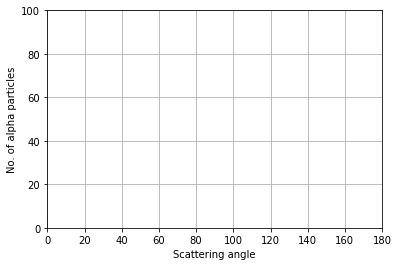

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

goldFoil = RutherfordSystem(activity=3.7e9, rMax= 0.5e-8, l=1.5e-8, t=4e-10, d=1e-8, particleType=ParticleType.ALPHA, nucleusType=ParticleType.GOLD)
goldFoil.cache("3DGold")
print(len(goldFoil.nuclei))
multSim = goldFoil.multiSim(100)

hist = plt.hist(multSim["angles"], 36)
plt.xlabel('Scattering angle')
plt.ylabel('No. of alpha particles')
plt.grid(True)

plt.show()

89.89443158865677


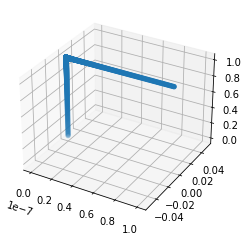

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

goldFoil = RutherfordSystem(3.7e9, 1e-12, 0, 0, 1e-7, ParticleType.ALPHA, ParticleType.GOLD)
singleSim = goldFoil.singleSim(b=2.144e-14)
print(singleSim["angle"])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(singleSim["positions"][...,0], singleSim["positions"][...,1], singleSim["positions"][...,2], marker = "o")
for nucleus in goldFoil.nuclei:
    ax.scatter(nucleus.position[0], nucleus.position[0], nucleus.position[2], marker = "X")
plt.show()

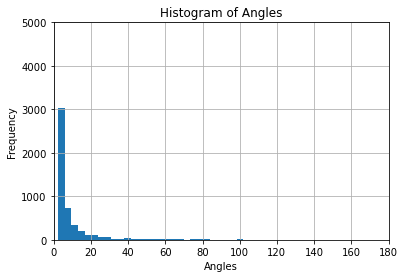

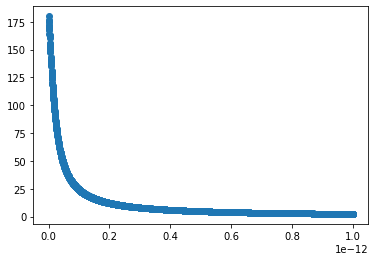

In [108]:
goldFoil = RutherfordSystem(3.7e9, 1e-12, 0, 0, 1e-4, ParticleType.ALPHA, ParticleType.GOLD)
multSim = goldFoil.multiSim(5000)

hist = plt.hist(multSim["angles"], 50)
plt.xlabel('Angles')
plt.ylabel('Frequency')
plt.title('Histogram of Angles')
plt.xlim(0, 180)
plt.ylim(0, 5000)
plt.grid(True)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(multSim["offsets"], multSim["angles"], marker = "o")

plt.show()